In [296]:
import os
from geopy import geocoders
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelWriter 
from geopy.geocoders import Nominatim
from time import sleep
geolocator = Nominatim(timeout=None)

import re
pd.set_option('display.max_columns', 50)

C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
#DO NOT RUN THIS

#This Kag_attack data set is the original kaggle data set.  This code block is all that has previously been done to the data
#previously and therefore it does not have to be run.  The csv imported after this is the altered data set.
#Because this block of code was time consuming and required multiple days to run for the geolocator it has already been done.

shark = pd.read_csv('/Users/dsf3564/Documents/DSC 502/Shark_data/attacks.csv',encoding='latin1')
shark.columns = shark.columns.str.strip()


shark['Location'] = shark.Location.replace(np.NaN, '')
shark['Area'] = shark.Area.replace(np.NaN, '')
shark['Country'] = shark.Country.replace(np.NaN,'')

shark["Full Location"] = shark.Location+", "+shark.Area+", "+shark.Country
shark['Full Location'] = shark['Full Location'].str.strip()

#This is how I got the location, lat and long using the "Full Location" column created

#Do not run this because you can only run 2500 requests per day and then you reach the limit, therefore I ran this over a 
#period of a few days until I was able to run all 6302 rows


from pandas import ExcelWriter 
from geopy.geocoders import Nominatim
from time import sleep
geolocator = Nominatim(timeout=None)

shark["Latitude"] = ''
shark["Longitude"] = ''

for i in range(0,6302):
    n = shark["Full Location"][i]
    if geolocator.geocode(n) is None:
        shark["Latitude"][i] = ""
        shark["Longitude"][i] = ""
    else:
        loc = geolocator.geocode(n)
        shark["Latitude"][i] = loc.latitude
        shark["Longitude"][i] = loc.longitude
    sleep(1)

#export the file with the Full Location and lat and long to attacks_new
shark.to_csv(r'C:\Users\dsf3564\Documents\DSC 502\Shark_data\attacks_new.csv')


In [297]:
#Importing csv that was exported in above code block.  Previously ran to get lat and long

shark = pd.read_csv('/Users/dsf3564/Documents/DSC 502/Shark_data/attacks_new.csv',encoding='latin1')

del shark["Unnamed: 0"]
del shark["Unnamed: 0.1"]
del shark["Unnamed: 0.1.1"]
del shark["Unnamed: 0.1.1.1"]
del shark["Unnamed: 0.1.1.1.1"]
del shark["Unnamed: 0.1.1.1.1.1"]
del shark["Unnamed: 0.1.1.1.1.1.1"]
del shark["Case Number.1"]
del shark["Case Number.2"]
del shark["Unnamed: 22"]
del shark["Unnamed: 23"]

shark.head()

Case Number       Date    Year        Type    Country             Area  \
0  2018.06.25  25-Jun-18  2018.0     Boating        USA       California   
1  2018.06.18  18-Jun-18  2018.0  Unprovoked        USA          Georgia   
2  2018.06.09   9-Jun-18  2018.0     Invalid        USA           Hawaii   
3  2018.06.08   8-Jun-18  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  2018.06.04   4-Jun-18  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity  \
0     Oceanside, San Diego County     Paddling   
1  St. Simon Island, Glynn County     Standing   
2                    Habush, Oahu      Surfing   
3              Arrawarra Headland      Surfing   
4                        La Ticla  Free diving   

                                                Name Sex  Age  \
0                                        Julie Wolfe   F   57   
1  AdysonÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...   F   11   
2                                        John Denges   M   48   
3                                               male   M  NaN   
4                                     Gustavo Ramos    M  NaN   

                                              Injury Fatal (Y/N)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
2       Injury to left lower leg from surfboard skeg           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   

            Time          Species          Investigator or Source  \
0          18h00      White shark                R. Collier, GSAF   
1  14h00  -15h00              NaN  K.McMurray, TrackingSharks.com   
2          07h45              NaN  K.McMurray, TrackingSharks.com   
3            NaN        2 m shark                  B. Myatt, GSAF   
4            NaN  Tiger shark, 3m                       A .Kipper   

                        pdf  \
0      2018.06.25-Wolfe.pdf   
1    2018.06.18-McNeely.pdf   
2     2018.06.09-Denges.pdf   
3  2018.06.08-Arrawarra.pdf   
4      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href  original order  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...            6303   
1  http://sharkattackfile.net/spreadsheets/pdf_di...            6302   
2  http://sharkattackfile.net/spreadsheets/pdf_di...            6301   
3  http://sharkattackfile.net/spreadsheets/pdf_di...            6300   
4  http://sharkattackfile.net/spreadsheets/pdf_di...            6299   

                                    Full Location   Latitude   Longitude  
0    Oceanside, San Diego County, California, USA  33.195870 -117.379483  
1    St. Simon Island, Glynn County, Georgia, USA        NaN         NaN  
2                       Habush, Oahu, Hawaii, USA        NaN         NaN  
3  Arrawarra Headland, New South Wales, AUSTRALIA -30.060426  153.201685  
4                        La Ticla, Colima, MEXICO        NaN         NaN

In [298]:
#Coded Sex column to only bring in if includes M or F
cut=r'(M|F)'
shark["Sex"] = shark["Sex"].str.extract(cut)
shark.Sex.value_counts()

M    5096
F     637
Name: Sex, dtype: int64

In [299]:
#Checking Values in Fatal column 
shark["Fatal (Y/N)"].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
N             1
M             1
y             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [300]:
#Make assumptions that unknown are alive, but missing are still missing
cut=r'(N|[Yy]|UNKNOWN)'
shark["Fatal (Y/N)"]= shark["Fatal (Y/N)"].str.extract(cut)

shark["Fatal (Y/N)"][shark["Fatal (Y/N)"] == 'y'] = 'Y'
shark["Fatal (Y/N)"][shark["Fatal (Y/N)"] == 'UNKNOWN'] = 'N'
shark["Fatal (Y/N)"].value_counts()


C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


N    4372
Y    1389
Name: Fatal (Y/N), dtype: int64

In [301]:
#Creates a new Activity type column using regex to extract a list of activity types and put into a new "Activity_type" column
act = r'([Ss]urf|[Ss]wim|[Bb]oat|[Ss]pear|[Ff]ish|[Bb]ath|[Ww]ading|[Dd]iving|[Ss]norkeling|[Bb]oard|[Ff]loat|[Rr]ow|[Ww]alking|[Kk]ayak|[Cc]anoe|[Ss]hip|[Ss]ki|[Ff]ell|[Ww]ash|[Tt]read|Unknown)'
shark['Activity_type'] = shark['Activity'].str.extract(act)
shark['Activity_type'] = shark['Activity_type'].fillna(value='other')

shark['Activity_type']=shark['Activity_type'].str.lower()

In [302]:
#Read times into new column 
#
shark['Hour'] = shark['Time'].str.extract(r'(\d+\D\d+)')
shark['Hour'] = shark['Hour'].str.replace(r'(\d+)\D(\d+)',r'\1\2')
shark['Hour'] = pd.to_numeric(shark['Hour'],errors='coerce')
shark['time_cat'] = pd.cut(shark['Hour'], [0,500,800,1100,1400,1700,2100,2400],labels=['Night','Early Morning','Morning','Midday','Afternoon','Evening','night'])
shark['time_cat'] = shark['time_cat'].str.lower()

pattern = r'([Aa]fternoon|[Mm]orning|[Nn]ight|[Ee]arly\s[Mm]orning|[Mm]idday|[Ee]vening)'
shark['time2'] = shark['Time'].str.extract(pattern)
shark['time_cat'] = shark['time_cat'].combine_first(shark['time2'].str.lower())

In [303]:
# With size -> group into ranges, convert meters to feet
# Match digits
size_pattern_ft = r"([\d\.]+)(?:')"
size_pattern_m = r'([\d\.]+)(?: ?m)'

# Extract based on patterns for feet and meters
shark['size_ft'] = shark['Species'].str.extract(size_pattern_ft)
shark['size_m'] = shark['Species'].str.extract(size_pattern_m)

# Convert string to numeric
shark['size_ft'] = pd.to_numeric(shark['size_ft'])
shark['size_m'] = pd.to_numeric(shark['size_m'],errors='coerce') #multiply to convert meters to feet

#Combine_first prioritizes first column so meter sizes are only used where ft is NaN
shark['size'] = shark.size_ft.combine_first(shark.size_m*3.3)

# group sizes into categories
shark['size_cat'] = pd.cut(shark['size'], [0,5,10,15,25,400],labels = ['0-5','5-10','10-15','15-25','25+'])

# remove 25+ entry because it is incorrectly reading millimeters
shark[shark['size_cat'] == '25+'] = np.nan

shark['size_cat'].value_counts()

5-10     858
0-5      569
10-15    346
15-25    171
25+        0
Name: size_cat, dtype: int64

In [304]:
# Shark species can have 1 or 2 names
# {attern selects a word with 3 or more letters and a group with a word followed by shark
species_pattern = r'([a-zA-Z]{3,})?\s*([a-zA-Z]{3,}\s*shark)'

# Extract based on the pattern into a dataframe with two columns
spec_df = shark['Species'].str.extract(species_pattern)

# Some species only have one word in addition to shark
spec_col = spec_df[1]

# If there is a match for the first group, concatenate the columns together
spec_col[spec_df[0].isnull() == False] = spec_df[0].str.cat(spec_df[1], sep='')
spec_col = spec_col.str.lower()

# Consolidate names for same shark species
spec_col[spec_col == 'zambesi shark'] = 'tiger shark'

# Remove small shark because it is not a species
spec_col[spec_col == 'small shark'] = np.nan

shark['shark_species'] = spec_col

In [305]:
#Injury regex patterns
#lacerat is incomplete to capture different versions of lacerate
#abrasions left out because they are generally less severe injuries, but made categorization more difficult

injury_type = r'(no injury|fatal|minor|lacerat|bitten|drown)'
injury_place = r'(no injury|fatal|foot|arm|hand|leg|calf|thigh|abdomen|chest)'
shark['Injury type'] = shark['Injury'].str.lower().str.extract(injury_type)

# rewrite lacerat to laceration
shark['Injury type'] = shark['Injury type'].str.replace(r'(lacerat)','laceration')
shark['Injury place'] = shark['Injury'].str.lower().str.extract(injury_place)

# Generalize thigh and calf locations to leg
shark['Injury place'] = shark['Injury place'].str.replace(r'(calf|thigh)','leg')

# Group abdomen location to chest
shark['Injury place'] = shark['Injury place'].str.replace(r'(abdomen)','chest')

In [306]:
top5sharks = (shark['shark_species']=='white shark') | (shark['shark_species']=='tiger shark') | (shark['shark_species']=='bull shark')| (shark['shark_species']=='bronzewhaler shark')| (shark['shark_species']=='blacktip shark')
pd.crosstab(shark['Injury type'],shark[top5sharks]['shark_species'])

shark_species  blacktip shark  bronzewhaler shark  bull shark  tiger shark  \
Injury type                                                                  
bitten                     24                   7          46           61   
drown                       0                   0           0            2   
fatal                       0                   4          34           71   
laceration                 16                  23          42           54   
minor                       3                   4           3            3   
no injury                   3                  19           6           46   

shark_species  white shark  
Injury type                 
bitten                 106  
drown                    1  
fatal                  140  
laceration              79  
minor                   14  
no injury              209

In [307]:
shark.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84',
       'Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\xa0 ',

In [308]:
#Age
#Create new column for Age 
shark.Age.str.strip()
shark["New_Age"] = shark["Age"]

#Replace teen/Teen/teens with 18 
shark.New_Age = shark.New_Age.str.replace(r'[Tt]eens*','18')

#Replace anything with A tildas character that includes the long string of random characters with a blank 
shark.New_Age = shark.New_Age.str.replace(r'(.*Ã+.*)',"")

#If young/adult/elderly make blank
shark.New_Age = shark.New_Age.str.replace(r'[Yy]oung|[Ee]lder|[Aa]dult',"")

#Replace random words with blanks 
shark.New_Age = shark.New_Age.str.replace(r'middle.*|MAKE.*|A\.M\.|ly|X.*|F.*',"")

#Fix all columns with mths in the string with the value in yr format
shark.New_Age[shark.New_Age == '18 months'] = 1.5
shark.New_Age[shark.New_Age == '9 months'] = .75
shark.New_Age[shark.New_Age == '2 to 3 months'] = .2

#Get rid of all null values
shark.New_Age[shark.New_Age.isna() == True] = ""

#If any string includes & or 'or' or 'to' avg out the first and 2nd number of the string
def avg(a):   
    b=str(a)
    if (b.find('&') < 0) and (b.find('or') < 0) and (b.find('to') < 0):
        return a
    
    try:
        f = int(a[:2])
        s = int(a[-2:])
        avg = (f+s)/2
        return avg
    except ValueError:
        return a

#use the function for all values in the New_Age column
shark["New_Age"] = [avg(x) for x in shark["New_Age"]]

#If any string includes "mid-" add 5 to the age value so it is in the middle of each 10 yr range
#For example if it says "mid-30s" change this number to 35, "mid-40s" to 45 etc.
def mid(a):    
    b = str(a)
    if b.find('mid-') < 0:
        return a
    
    try:
        numb = int(a[4:6]) 
        value = numb + 5
        return value
    except ValueError:
        return a

#use the function for all values in the New_Age column
shark["New_Age"] = [mid(x) for x in shark["New_Age"]]

#Convert everything into a string
shark["New_Age"] = [str(x) for x in shark["New_Age"]]

#Just keep number values in the string
shark.New_Age = shark.New_Age.str.extract(r'(\d+).*')

#get rid of nan values 
shark.New_Age[shark.New_Age.isna() == True] = ""

shark.New_Age.unique()

C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dsf3564\AppData\Local\conda\conda\envs\test\lib\site-packa

array(['57', '11', '48', '', '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '13', '42', '3', '8', '50',
       '16', '82', '73', '68', '51', '39', '58', '47', '61', '65', '36',
       '66', '43', '9', '72', '59', '6', '27', '64', '23', '71', '44',
       '62', '63', '70', '1', '53', '77', '74', '5', '86', '84', '75',
       '87', '67', '0', '81', '78'], dtype=object)

In [310]:
#Save the cleaned dataframe to csv
shark.to_csv((r'C:\Users\dsf3564\Documents\DSC 502\Shark_data\FinalShark_Data.csv'))

In [311]:
#Reads in saved data set of clean data
shark = pd.read_csv('/Users/dsf3564/Documents/DSC 502/Shark_data/FinalShark_Data.csv',encoding='latin1')

In [312]:
#Location data set that doesn't include any null values for latitude and longitude
shark_loc = shark[shark["Latitude"].isnull()==False]

In [313]:
#Save the location data frame to csv
shark_loc.to_csv(r'C:\Users\dsf3564\Documents\DSC 502\Shark_data\FinalShark_LocationData.csv')

In [314]:
shark.head()

Unnamed: 0 Case Number       Date    Year        Type    Country  \
0           0  2018.06.25  25-Jun-18  2018.0     Boating        USA   
1           1  2018.06.18  18-Jun-18  2018.0  Unprovoked        USA   
2           2  2018.06.09   9-Jun-18  2018.0     Invalid        USA   
3           3  2018.06.08   8-Jun-18  2018.0  Unprovoked  AUSTRALIA   
4           4  2018.06.04   4-Jun-18  2018.0    Provoked     MEXICO   

              Area                        Location     Activity  \
0       California     Oceanside, San Diego County     Paddling   
1          Georgia  St. Simon Island, Glynn County     Standing   
2           Hawaii                    Habush, Oahu      Surfing   
3  New South Wales              Arrawarra Headland      Surfing   
4           Colima                        La Ticla  Free diving   

                                                Name Sex  Age  \
0                                        Julie Wolfe   F   57   
1  AdysonÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...   F   11   
2                                        John Denges   M   48   
3                                               male   M  NaN   
4                                     Gustavo Ramos    M  NaN   

                                              Injury Fatal (Y/N)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
2       Injury to left lower leg from surfboard skeg           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   

            Time          Species          Investigator or Source  \
0          18h00      White shark                R. Collier, GSAF   
1  14h00  -15h00              NaN  K.McMurray, TrackingSharks.com   
2          07h45              NaN  K.McMurray, TrackingSharks.com   
3            NaN        2 m shark                  B. Myatt, GSAF   
4            NaN  Tiger shark, 3m                       A .Kipper   

                        pdf  \
0      2018.06.25-Wolfe.pdf   
1    2018.06.18-McNeely.pdf   
2     2018.06.09-Denges.pdf   
3  2018.06.08-Arrawarra.pdf   
4      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href  original order  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...          6303.0   
1  http://sharkattackfile.net/spreadsheets/pdf_di...          6302.0   
2  http://sharkattackfile.net/spreadsheets/pdf_di...          6301.0   
3  http://sharkattackfile.net/spreadsheets/pdf_di...          6300.0   
4  http://sharkattackfile.net/spreadsheets/pdf_di...          6299.0   

                                    Full Location   Latitude   Longitude  \
0    Oceanside, San Diego County, California, USA  33.195870 -117.379483   
1    St. Simon Island, Glynn County, Georgia, USA        NaN         NaN   
2                       Habush, Oahu, Hawaii, USA        NaN         NaN   
3  Arrawarra Headland, New South Wales, AUSTRALIA -30.060426  153.201685   
4                        La Ticla, Colima, MEXICO        NaN         NaN   

  Activity_type    Hour       time_cat time2  size_ft  size_m  size size_cat  \
0         other  1800.0        evening   NaN      NaN     NaN   NaN      NaN   
1         other  1400.0         midday   NaN      NaN     NaN   NaN      NaN   
2          surf   745.0  early morning   NaN      NaN     NaN   NaN      NaN   
3          surf     NaN            NaN   NaN      NaN     2.0   6.6     5-10   
4        diving     NaN            NaN   NaN      NaN     3.0   9.9     5-10   

  shark_species Injury type Injury place  New_Age  
0   white s

Plotting - Bokeh

In [315]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20

output_notebook()


Loading BokehJS ...

In [316]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 36 columns):
Unnamed: 0                6302 non-null int64
Case Number               6300 non-null object
Date                      6301 non-null object
Year                      6299 non-null float64
Type                      6297 non-null object
Country                   6251 non-null object
Area                      5846 non-null object
Location                  5761 non-null object
Activity                  5757 non-null object
Name                      6091 non-null object
Sex                       5733 non-null object
Age                       3471 non-null object
Injury                    6273 non-null object
Fatal (Y/N)               5760 non-null object
Time                      2948 non-null object
Species                   3463 non-null object
Investigator or Source    6284 non-null object
pdf                       6301 non-null object
href formula              6300 non-null object


In [ ]:
#top species
shark['shark_species'].value_counts()

In [ ]:
#top species graphed
shark['shark_species'].value_counts().nlargest(10).plot.bar()
plt.title('Top 10 Shark Species')
plt.show()

In [ ]:
#top countries
shark['Country'].value_counts()

In [ ]:
#Top countries graphed
shark['Country'].value_counts().nlargest(10).plot.bar()
plt.title('Top 10 Countries by Shark Attack Occurance')
plt.show()

In [349]:
shark['Activity_type'].value_counts()

surf          1194
other         1157
swim          1096
fish           706
diving         536
spear          416
board          207
bath           191
wading         169
snorkeling      95
fell            88
boat            87
ship            61
kayak           57
float           50
tread           38
row             37
ski             35
canoe           27
walking         26
wash            23
unknown          5
Name: Activity_type, dtype: int64

In [ ]:
#Bar graph for activity type
shark['Activity_type'].value_counts().plot(kind='bar')
plt.title('Activity During Attack')
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.show()

In [ ]:
#top 5 activities
shark['Activity_type'].value_counts()[:5].plot(kind='bar')
plt.title('Top 5 Activities')
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.show()

In [ ]:
#top activities in us
shark[shark.Country=='USA'].Activity_type.value_counts()

In [ ]:
#top us activities graphed
shark[shark.Country=='USA'].Activity_type.value_counts().plot.bar()
plt.title('Activity During Attack in the USA')
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.show()

In [ ]:
#top Australian activities
shark[shark.Country=='AUSTRALIA'].Activity_type.value_counts()

In [ ]:
#graphed
shark[shark.Country=='AUSTRALIA'].Activity_type.value_counts().plot.bar()
plt.title('Activity During Attack in Australia')
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.show()

In [ ]:
#top South African
shark[shark.Country=='SOUTH AFRICA'].Activity_type.value_counts()

In [ ]:
#graphed
shark[shark.Country=='SOUTH AFRICA'].Activity_type.value_counts().nlargest(10).plot.bar()
plt.title('Activity During Attack in South Africa')
plt.xlabel('Activity')
plt.ylabel('Attacks')
plt.show()

In [317]:
group=shark.groupby('Activity_type').count().sort_values(by = ['Year'], ascending = False)
group.index = [x.title() for x in group.index]  #upper case index
group.index.rename('Activity_type', inplace=True)
group.head()

Unnamed: 0  Case Number  Date  Year  Type  Country  Area  \
Activity_type                                                             
Surf                 1194         1194  1194  1194  1193     1193  1184   
Other                1157         1157  1157  1157  1156     1143  1009   
Swim                 1096         1096  1096  1095  1096     1089  1039   
Fish                  706          705   706   706   705      705   652   
Diving                536          536   536   536   535      530   483   

               Location  Activity  Name   Sex  Age  Injury  Fatal (Y/N)  Time  \
Activity_type                                                                   
Surf               1180      1194  1184  1164  935    1188         1147   907   
Other               983       613  1062   906  410    1142          974   291   
Swim               1024      1096  1078  1070  708    1094          994   560   
Fish                657       706   689   551  231     705          671   185   
Diving              453       536   519   518  275     534          478   207   

               Species  Investigator or Source   pdf  href formula  href  \
Activity_type                                                              
Surf               741                    1188  1194          1193  1194   
Other              540                    1153  1157          1157  1157   
Swim               511                    1095  1096          1096  1096   
Fish               430                     704   706           706   706   
Diving             340                     535   536           536   536   

               original order  Full Location  Latitude  Longitude  Hour  \
Activity_type                                                             
Surf                     1194           1194       718        718   798   
Other                    1157           1157       611        611   217   
Swim                     1096           1096       609        609   447   
Fish                      706            706       346        346   115   
Diving                    536            536       239        239   167   

               time_cat  time2  size_ft  size_m  size  size_cat  \
Activity_type                                                     
Surf                885     90      398     321   515       515   
Other               284     67      191     145   229       228   
Swim                541     95      203     169   236       236   
Fish                172     57      188     164   245       245   
Diving              205     38      144     148   186       186   

               shark_species  Injury type  Injury place  New_Age  
Activity_type                                                     
Surf                     434          988          1010      934  
Other                    232          794           753      407  
Swim                     265          905           931      703  
Fish                     245          556           570      227  
Diving                   237          412           418      275

In [318]:
from bokeh.palettes import Category20 as palette
import itertools
from bokeh.palettes import all_palettes
from bokeh.palettes import Viridis256

color=Viridis256[:256:11]

source=ColumnDataSource(group)
Activities=source.data['Activity_type'].tolist()

#outputs to html file
output_file("activity.html")

s = figure(x_range=Activities)
    
color_map = factor_cmap(field_name='Activity_type', 
                    palette=color, factors=Activities)

s.vbar(x='Activity_type', top='Year', source=source ,width=.7, color=color_map)

s.title.text ='Global Shark Attack by Activity'
s.xaxis.axis_label = 'Activity'
s.yaxis.axis_label = 'Attacks'

s.xaxis.major_label_orientation = np.pi/2

hover = HoverTool()
hover.tooltips = [
    ("Activity", "@Activity_type"),
     ("Attacks", "@Year")]

hover.mode = 'vline'

s.add_tools(hover)

show(s)

In [350]:
shark.groupby(['Country'])['Activity_type'].value_counts().nlargest(25)

Country           Activity_type
USA               surf             675
                  swim             379
                  other            344
AUSTRALIA         surf             245
                  other            235
                  swim             201
USA               fish             194
AUSTRALIA         fish             172
                  diving           160
SOUTH AFRICA      surf             135
USA               diving           133
                  wading           114
SOUTH AFRICA      swim             106
USA               board            103
SOUTH AFRICA      other             96
AUSTRALIA         spear             89
USA               spear             80
SOUTH AFRICA      fish              67
AUSTRALIA         bath              66
SOUTH AFRICA      spear             55
BAHAMAS           spear             40
PAPUA NEW GUINEA  other             38
BRAZIL            surf              37
                  swim              35
USA               kayak         

In [319]:
groupb=shark.groupby(['Country','Activity_type'], as_index= False).count().sort_values(by = ['Year'], ascending = False).head(20)
groupb.head()

Country Activity_type  Unnamed: 0  Case Number  Date  Year  Type  Area  \
720        USA          surf         675          675   675   675   675   675   
721        USA          swim         379          379   379   379   379   379   
714        USA         other         344          344   344   344   344   342   
37   AUSTRALIA          surf         245          245   245   245   244   245   
31   AUSTRALIA         other         235          235   235   235   235   233   

     Location  Activity  Name  Sex  Age  Injury  Fatal (Y/N)  Time  Species  \
720       671       675   667  653  550     671          644   539      405   
721       365       379   376  376  267     379          346   242      192   
714       326       210   332  308  176     343          293   143      183   
37        244       245   244  243  179     244          236   180      166   
31        225       112   225  175   88     230          201    52      110   

     Investigator or Source  pdf  href formula  href  original order  \
720                     672  675           675   675             675   
721                     379  379           379   379             379   
714                     342  344           344   344             344   
37                      243  245           244   245             245   
31                      235  235           235   235             235   

     Full Location  Latitude  Longitude  Hour  time_cat  time2  size_ft  \
720            675       454        454   482       525     45      272   
721            379       269        269   201       232     32      101   
714            344       241        241   114       143     29       85   
37             245       158        158   157       178     21       57   
31             235       137        137    32        48     16       41   

     size_m  size  size_cat  shark_species  Injury type  Injury place  New_Age  
720     118   277       277            206          560           565      549  
721      55   102       102             93          305           321      266  
714      42    90        89             79          256           242      176  
37       96   123       123            101          201           208      179  
31       33    51        51             49          144           137       86

In [320]:
from bokeh.models import ColumnDataSource, FactorRange

color=Viridis256[:256:10]

#outputs to html
output_file("country.html")

country = list(groupb.Country)
activity = list(groupb.Activity_type)

x = [(country[x],activity[x]) for x in range(len(country))]
count =  list(groupb.Year)

source=ColumnDataSource(data=dict(x=x, count=count, country=country, activity=activity))

b = figure(x_range=FactorRange(*x))
    
color_map = factor_cmap(field_name='x', 
                    palette=color, factors=x)

b.vbar(x='x', top='count', source=source ,width=.1, color=color_map)

b.title.text ='Global Shark Attack by Country & Activity'
b.xaxis.axis_label = 'Country and Activity'
b.yaxis.axis_label = 'Attacks'

b.xaxis.major_label_orientation = np.pi/2

hover = HoverTool()
hover.tooltips = [
    ("Country", "@country"),
    ("Activity", "@activity"),
     ("Attacks", "@count")]

hover.mode = 'vline'

b.add_tools(hover)

show(b)

Plotting - Matplotlib

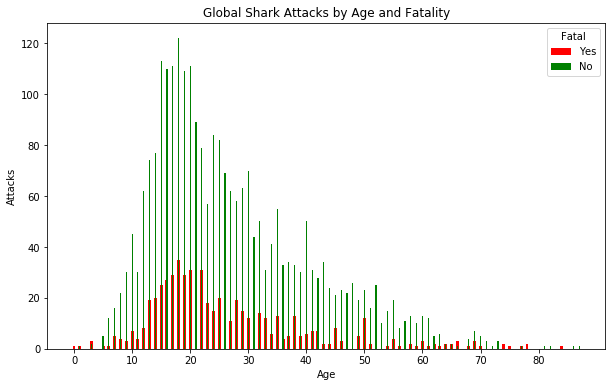

In [322]:
n=shark[shark["Fatal (Y/N)"] == 'N'].groupby(['Fatal (Y/N)','New_Age'],as_index=False).count()
y=shark[shark["Fatal (Y/N)"] == 'Y'].groupby(['Fatal (Y/N)','New_Age'],as_index=False).count()

plt.figure(figsize=(10,6))

plt.bar(y.iloc[:,1],y.iloc[:,2], width = .5,label='Yes', color='r')
plt.bar(n.iloc[:,1],n.iloc[:,2],width = .2, label='No', color='g')

plt.legend(title='Fatal')

plt.xlabel('Age')
plt.ylabel('Attacks')
plt.xticks(np.arange(0,90,10))
plt.title('Global Shark Attacks by Age and Fatality')
plt.show()


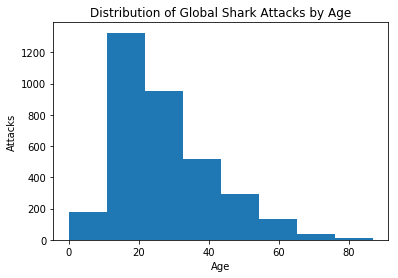

In [45]:
%matplotlib inline

x = list(shark.New_Age[shark.New_Age.isna() == False])

plt.hist(x, bins=8)
plt.xlabel("Age")
plt.ylabel("Attacks")
plt.title("Distribution of Global Shark Attacks by Age")

plt.show()

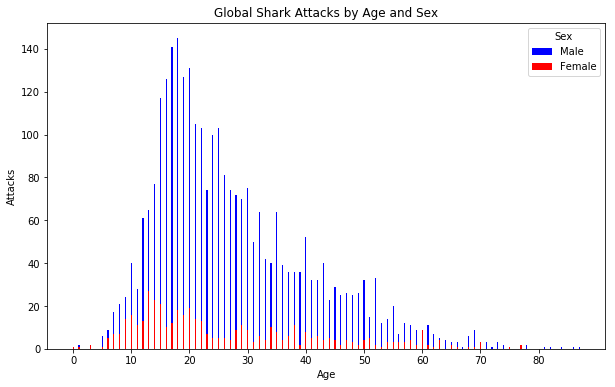

In [323]:
m=shark[shark["Sex"] == 'M'].groupby(['Sex','New_Age'],as_index=False).count()
f=shark[shark["Sex"] == 'F'].groupby(['Sex','New_Age'],as_index=False).count()

plt.figure(figsize=(10,6))

plt.bar(m.iloc[:,1],m.iloc[:,2], width = .2,label='Male', color='b')
plt.bar(f.iloc[:,1],f.iloc[:,2],width = .2, label='Female', color='r')

plt.legend(title='Sex')

plt.xlabel('Age')
plt.ylabel('Attacks')
plt.xticks(np.arange(0,90,10))
plt.title('Global Shark Attacks by Age and Sex')
plt.show()

In [353]:
shark.groupby(['size_cat'])['Activity_type'].value_counts().nlargest(25)

size_cat  Activity_type
5-10      surf             229
0-5       surf             171
5-10      spear            117
          swim             106
          other             93
          fish              89
10-15     surf              86
0-5       swim              77
5-10      diving            77
0-5       other             76
          fish              63
10-15     fish              60
0-5       spear             52
10-15     other             42
0-5       wading            41
10-15     diving            39
          swim              39
15-25     diving            39
5-10      board             38
15-25     fish              33
0-5       diving            31
15-25     surf              29
10-15     spear             28
5-10      snorkeling        27
0-5       board             17
Name: Activity_type, dtype: int64

In [351]:
shark.groupby(['Hour'])['Activity_type'].value_counts().nlargest(25)

Hour    Activity_type
1100.0  surf             43
1400.0  surf             33
1630.0  surf             32
1500.0  surf             31
1600.0  surf             30
1700.0  surf             30
1500.0  swim             28
1730.0  surf             28
1200.0  spear            24
1800.0  surf             24
1530.0  surf             23
1130.0  surf             22
1200.0  surf             22
        swim             22
1800.0  swim             22
1300.0  surf             21
1630.0  swim             21
1000.0  surf             20
1330.0  surf             20
900.0   surf             19
930.0   surf             19
1430.0  surf             18
        swim             18
1030.0  surf             17
1600.0  other            17
Name: Activity_type, dtype: int64

In [352]:
shark.groupby(['time_cat'])['Activity_type'].value_counts().nlargest(25)

time_cat       Activity_type
afternoon      surf             270
morning        surf             213
afternoon      swim             199
midday         surf             189
evening        surf             129
midday         swim             120
afternoon      other             98
evening        swim              97
early morning  surf              79
morning        swim              76
midday         spear             66
morning        diving            64
afternoon      diving            62
midday         diving            57
morning        other             53
midday         other             52
afternoon      board             51
               spear             51
morning        spear             51
afternoon      wading            43
evening        other             40
afternoon      fish              39
morning        fish              36
night          fish              36
midday         wading            34
Name: Activity_type, dtype: int64

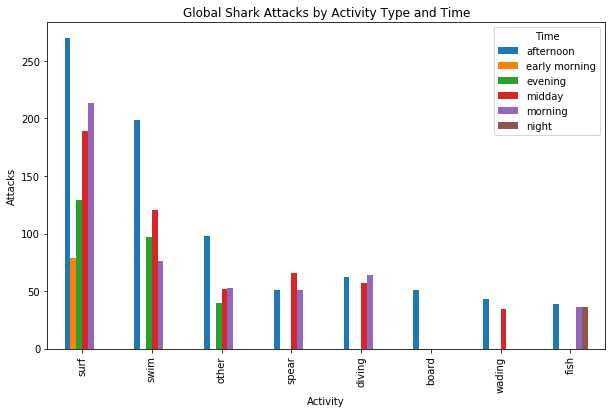

In [324]:
shark.groupby('time_cat').Activity_type.value_counts().nlargest(25).unstack(0).plot.bar(figsize=[10,6])

plt.xlabel("Activity")
plt.ylabel("Attacks")
plt.legend(title = "Time")
plt.title("Global Shark Attacks by Activity Type and Time")

plt.show()

In [347]:
shark.groupby('shark_species').time_cat.value_counts().nlargest(25)

shark_species       time_cat     
white shark         afternoon        130
                    morning          130
                    midday           106
bull shark          afternoon         49
tiger shark         afternoon         49
                    morning           43
                    midday            41
white shark         early morning     35
                    evening           35
bull shark          morning           28
tiger shark         evening           23
bull shark          midday            16
tiger shark         early morning     16
blacktip shark      afternoon         15
bull shark          evening           15
bronzewhaler shark  midday            13
spinner shark       midday            13
bronzewhaler shark  afternoon         11
spinner shark       morning           11
blacktip shark      morning           10
nurse shark         afternoon         10
raggedtooth shark   evening            9
bull shark          early morning      8
greynurse shark     aft

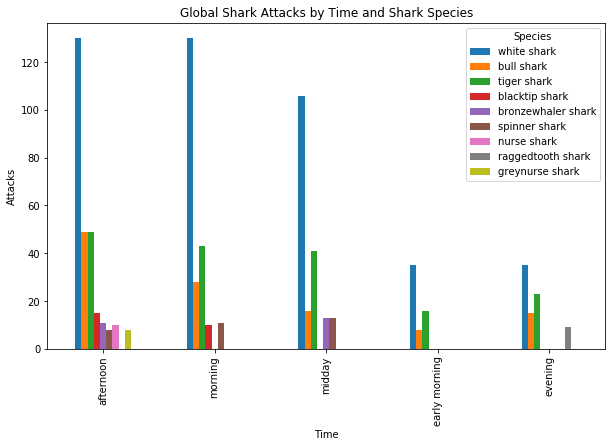

In [325]:
shark.groupby('shark_species').time_cat.value_counts().nlargest(25).unstack(0).plot.bar(figsize=[10,6])

plt.xlabel("Time")
plt.ylabel("Attacks")
plt.legend(title = "Species")
plt.title("Global Shark Attacks by Time and Shark Species")
plt.show()

In [344]:
shark['time_cat'].value_counts()

afternoon        924
midday           641
morning          621
evening          375
early morning    172
night            123
Name: time_cat, dtype: int64

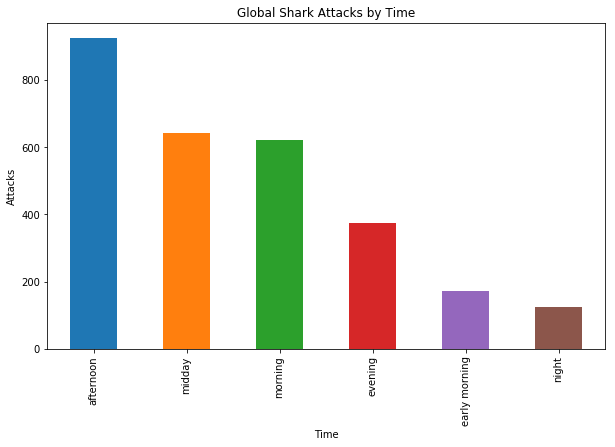

In [326]:
plt.figure(figsize=(10,6))
shark['time_cat'].value_counts().plot.bar(color=['#1f77b4','#d62728','#9467bd','#2ca02c','#ff7f0e'])
#manually set the colors so they would match the next graph
plt.xlabel("Time")
plt.ylabel("Attacks")
plt.title("Global Shark Attacks by Time")
plt.show()


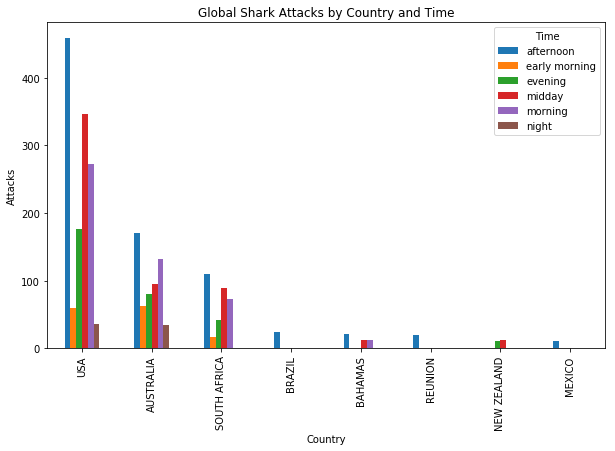

In [327]:
shark.groupby('time_cat').Country.value_counts().nlargest(25).unstack(0).plot.bar(figsize=[10,6])

plt.xlabel("Country")
plt.ylabel("Attacks")
plt.legend(title='Time')
plt.title("Global Shark Attacks by Country and Time")
plt.show()

In [348]:
shark['shark_species'].value_counts().nlargest(25)

white shark              621
tiger shark              286
bull shark               171
bronzewhaler shark        60
blacktip shark            56
nurse shark               50
mako shark                47
wobbegong shark           46
spinner shark             43
raggedtooth shark         43
greynurse shark           40
lemon shark               37
blue shark                37
hammerhead shark          37
oceanicwhitetip shark     25
sandtiger shark           20
greyreef shark            17
caribbeanreef shark       15
sand shark                15
reef shark                14
dusky shark               11
blacktipreef shark        10
sevengill shark            9
gill shark                 7
basking shark              7
Name: shark_species, dtype: int64

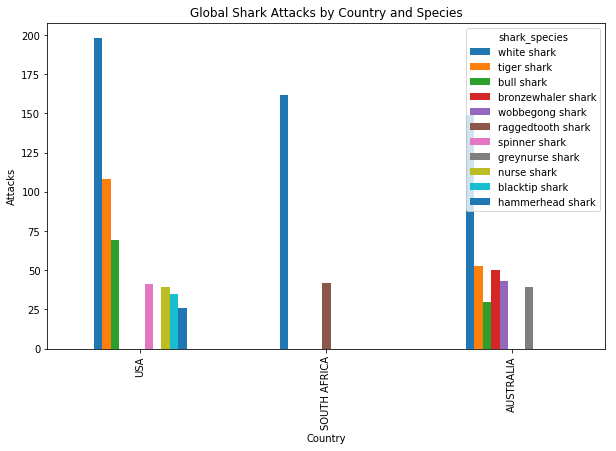

In [328]:
shark.groupby('shark_species').Country.value_counts().nlargest(15).unstack(0).plot.bar(figsize=[12,8])
plt.xlabel("Country")
plt.ylabel("Attacks")
plt.title("Global Shark Attacks by Country and Species")
plt.show()

plt.show()

In [ ]:
#Injury types, color coded to match next graph
shark['Injury_type'].value_counts().plot.bar(color=['#2ca02c','#1f77b4','#d62728','#8c564b','#9467bd','#ff7f0e'])
plt.title('Injury Types')
plt.ylabel('Attacks')
plt.xlabel
plt.show()

In [ ]:
#Injury by species
shark[top5sharks].groupby('Injury_type').time_cat.value_counts().unstack(0).plot.bar(figsize=[12,8])
plt.title('Injury Types Caused by the Top 5 Shark Species')
plt.xlabel('Shark Species')
plt.ylabel('Attacks')
plt.show()

Using Folium to Plot Shark Attacks by location

In [332]:
import folium
location= shark[['Latitude','Longitude']][(shark.Latitude.isnull() == False)]
location.head()

Latitude   Longitude
0  33.195870 -117.379483
3 -30.060426  153.201685
5 -28.842955  153.607990
8  28.329849  -80.620547
9  29.210815  -81.022833

In [333]:
sw = [location.Latitude.min(),location.Longitude.min()]
ne = [location.Latitude.max(),location.Longitude.max()]
sw, ne

([-51.9666424, -179.9354607], [72.819375, 179.96263000000005])

In [334]:
m = folium.Map([location.Latitude.median(),location.Longitude.median()])
m.fit_bounds([sw,ne])
m

In [335]:
for i in range(len(location)):
    folium.CircleMarker([location.iloc[i,0],location.iloc[i,1]],radius=3, fill=True, color='#000099', fill_color='#000099', popup='Lat: {0}\n Long: {1}'.format(round(location.iloc[i,0],2),round(location.iloc[i,1],2))).add_to(m)

In [336]:
m

In [337]:
m.save(r'C:\Users\dsf3564\Documents\DSC 502\Shark Project\Folium Graphs\Map_1.html')

Weather Data - Used this data to map in ArcGis

In [354]:
weather = pd.read_csv('/Users/dsf3564/Documents/DSC 502/Shark_data/RawWaterData.csv',encoding='latin1')
pd.set_option('display.max_columns', 50)

In [355]:
#creating a country column from station name so that they can be merged to the shark data set
weather['country']=weather['NAME'].str.extract(r'^.+,\s(.+)')
weather['country']=weather['country'].str.replace('SF', 'SOUTH AFRICA')
weather['country']=weather['country'].str.replace('NC US','USA')
weather['country']=weather['country'].str.replace('FL US','USA')
weather['country']=weather['country'].str.replace('AS','AUSTRALIA')

In [356]:
#convert to datetime for the merge
weather['DATE']=pd.to_datetime(weather['DATE'])

In [357]:
#convert shark data to datetime to merge with weather data
shark['Date']=pd.to_datetime(shark['Date'],errors = 'coerce')

In [358]:
#merged both data sets on country and date
new=pd.merge(weather,shark , how='outer', left_on=['country','DATE'], right_on=['Country','Date'])

In [359]:
#delete rows from weather data that don't match up with an attack
new=new[new['Case Number'].notnull()]

In [360]:
#The first merge matched by country so it included all states from the shark data, we only want NC and FL
new1=new[(new['Area']=='North Carolina')|(new['Area']=='Florida')]
#Also want to drop any other countries that snuck in so only keep South Africa and Australia
new2=new[(new['Country']=='SOUTH AFRICA')|(new['Country']=='AUSTRALIA')]
new=pd.concat([new1,new2])


In [361]:
#percpitation was a range of values, only wanted to see if there was perecpiation that day or not
new['PRCP']=[x>0 for x in new['PRCP']]

In [362]:
new.head()

STATION                                      NAME       DATE  AWND  \
7614  US1NCCR0028                        OCEAN 0.5 S, NC US 2011-04-22   NaN   
7615  USC00085612  MELBOURNE WEATHER FORECAST OFFICE, FL US 2011-04-22   NaN   
7622  US1NCCR0028                        OCEAN 0.5 S, NC US 2011-04-26   NaN   
7623  USC00085612  MELBOURNE WEATHER FORECAST OFFICE, FL US 2011-04-26   NaN   
7650  US1NCCR0028                        OCEAN 0.5 S, NC US 2011-05-10   NaN   

      DAPR  DWPR    FMTM  MDPR   PRCP  SNOW  SNWD  TAVG  TMAX  TMIN  TOBS  \
7614   NaN   NaN     NaN   NaN   True   0.0   0.0   NaN   NaN   NaN   NaN   
7615   NaN   NaN  1354.0   NaN  False   NaN   NaN   NaN  82.0  63.0   NaN   
7622   NaN   NaN     NaN   NaN  False   0.0   0.0   NaN   NaN   NaN   NaN   
7623   NaN   NaN  1749.0   NaN   True   NaN   NaN   NaN  86.0  71.0   NaN   
7650   NaN   NaN     NaN   NaN  False   0.0   0.0   NaN   NaN   NaN   NaN   

       WDF2   WDF5  WESD  WESF  WSF2  WSF5  WT01  WT02  WT03  WT04   ...    \
7614    NaN    NaN   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   ...     
7615  100.0   90.0   NaN   NaN  15.0  21.0   NaN   NaN   NaN   NaN   ...     
7622    NaN    NaN   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   ...     
7623  140.0  140.0   NaN   NaN  25.1  31.1   NaN   NaN   NaN   NaN   ...     
7650    NaN    NaN   0.0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   ...     

      Age                                             Injury  Fatal (Y/N)  \
7614   49                              Minor puncture wounds            N   
7615   49                              Minor puncture wounds            N   
7622   32                                        Calf bitten            N   
7623   32                                        Calf bitten            N   
7650  NaN  Laceration to arm by captive shark PROVOKED IN...            N   

       Time            Species                     Investigator or Source  \
7614  15h30     1' to 2' shark                               S. Petersohn   
7615  15h30     1' to 2' shark                               S. Petersohn   
7622    NaN    Bull shark, 12'  J. Wigham III, Palm Beach Post, 4/27/2011   
7623    NaN    Bull shark, 12'  J. Wigham III, Palm Beach Post, 4/27/2011   
7650    NaN  Sandbar shark, 8'                          News 7, 5/11/2011   

                          pdf  \
7614  2011.04.22-RonWhite.pdf   
7615  2011.04.22-RonWhite.pdf   
7622  2011.04.26-Seagrich.pdf   
7623  2011.04.26-Seagrich.pdf   
7650    2011.05.10-Storch.pdf   

                                           href formula  \
7614  http://sharkattackfile.net/spreadsheets/pdf_di...   
7615  http://sharkattackfile.net/spreadsheets/pdf_di...   
7622  http://sharkattackfile.net/spreadsheets/pdf_di...   
7623  http://sharkattackfile.net/spreadsheets/pdf_di...   
7650  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href original order  \
7614  http://sharkattackfile.net/spreadsheets/pdf_di...         5373.0   
7615  http://sharkattackfile.net/spreadsheets/pdf_di...         5373.0   
7622  http://sharkattackfile.net/spreadsheets/pdf_di...         5375.0   
7623  http://sharkattackfile.net/spreadsheets/pdf_di...         5375.0   
7650  http://sharkattackfile.net/spreadsheets/pdf_di...         5378.0   

                                       Full Location   Latitude  Longitude  \
7614  New Smyrna Beach, Volusia County, Florida, USA  29.025819 -80.926998   
7615  New Smyrna Beach, Volusia County, Florida, USA  29.025819 -80.926998   
7622  Riviera Beach, Palm Beach County, Florida, USA  26.775341 -80.058097   
7623  Riviera Beach, Palm Beach County, Florida, USA  26.775341 -80.058097   
7650                             Miami, Florida, USA  25.774266 -80.193659   

     Activity_type    Hour   time_cat time2 size_ft size_m  size size_cat  \
7614          surf  1530.0  afternoon   NaN     1.0    NaN   1.0      0-5   
7615          surf  1530.0  afternoon   NaN     1

In [363]:
new.Country.value_counts()

AUSTRALIA       1338
USA             1329
SOUTH AFRICA     578
Name: Country, dtype: int64

In [364]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 7614 to 21582
Data columns (total 69 columns):
STATION                   1210 non-null object
NAME                      1210 non-null object
DATE                      1210 non-null datetime64[ns]
AWND                      18 non-null float64
DAPR                      8 non-null float64
DWPR                      8 non-null float64
FMTM                      38 non-null float64
MDPR                      8 non-null float64
PRCP                      3245 non-null bool
SNOW                      547 non-null float64
SNWD                      546 non-null float64
TAVG                      4 non-null float64
TMAX                      609 non-null float64
TMIN                      604 non-null float64
TOBS                      533 non-null float64
WDF2                      76 non-null float64
WDF5                      76 non-null float64
WESD                      191 non-null float64
WESF                      191 non-null float64
WS

In [365]:
new.to_csv(r'C:\Users\dsf3564\Documents\DSC 502\Shark_data\FinalWeather&SharkData.csv')

In [ ]:
#Bar chart of precipiation
new['PRCP'].value_counts().plot.bar()plt.title('Activity During Attack')
plt.title('Precipitation (True or False)')
plt.xlabel('Precipiation')
plt.ylabel('Count')
plt.show()

In [ ]:
#average wind speed
new['AWND'].value_counts().plot.bar()
plt.title('Average Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()

In [ ]:
#value counts of tempurate observed
new['TOBS'].value_counts().nlargest(15).plot.bar()
plt.title('Observed Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

In [ ]:
# Max temps
new['TMAX'].value_counts().nlargest(15).plot.bar()
plt.title('Maximum Tempuratures')
plt.xlabel('Tempurature')
plt.ylabel('Count')
plt.show()

In [ ]:
#min temps
new['TMIN'].value_counts().nlargest(15).plot.bar()
plt.title('Minimum Temperatures')
plt.xlabel('Tempurature')
plt.ylabel('Count')
plt.show()